# **Visualizing Earnings Based on College Majors**

Setting up the environment

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
#controlling figure aesthetics: set font size, color palette, and style using seaborn
sns.set(font_scale=1.3)
sns.set_palette("husl")
sns.set_style("white")

In [3]:
%matplotlib inline

**Reading & Exploring**

Read the dataset into a DataFrame and start exploring the data

In [4]:
recent_grads = pd.read_csv('recent-grads.csv')
recent_grads.iloc[:1] #return the first row formatted as a table.


,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193


In [5]:
recent_grads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173 entries, 0 to 172
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Rank                  173 non-null    int64  
 1   Major_code            173 non-null    int64  
 2   Major                 173 non-null    object 
 3   Total                 172 non-null    float64
 4   Men                   172 non-null    float64
 5   Women                 172 non-null    float64
 6   Major_category        173 non-null    object 
 7   ShareWomen            172 non-null    float64
 8   Sample_size           173 non-null    int64  
 9   Employed              173 non-null    int64  
 10  Full_time             173 non-null    int64  
 11  Part_time             173 non-null    int64  
 12  Full_time_year_round  173 non-null    int64  
 13  Unemployed            173 non-null    int64  
 14  Unemployment_rate     173 non-null    float64
 15  Median                1

In [6]:
recent_grads.head() #familiarize ourself with how the data is structured.

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


the dataset is ordered by Rank. So we can see that ...
- Majors in top 5 highest median earnings are in the engineering category
- Majors in the bottom 5 lowest median earnings are in the biology & life science, psychology & social work, and education categories

In [7]:
recent_grads.describe() #summary statistics for all of the numeric columns

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Cleaning: Dropping Rows With Missing Values

We need to drop rows with missing values, because Matplotlib expects that columns of values we pass in have matching lengths and missing values will cause matplotlib to throw errors

In [8]:
#drop rows containing missing values
recent_grads = recent_grads.dropna()

In [9]:
#check the number of rows of the cleaned DataFrame
cleaned_data_count = len(recent_grads.index)
cleaned_data_count

172

**Scatterplot: Exploring The Relationship Between Some Columns**

Using sns.scatterplot()

Let's generate scatter plots to explore the following relations:
- Sample_size and Median
- Sample_size and Unemployment_rate
- Full_time and Median
- ShareWomen and Unemployment_rate
- Men and Median
- Women and Median

And then, let's answer the following questions:
- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?
- Is there any link between the number of full-time employees and median salary?

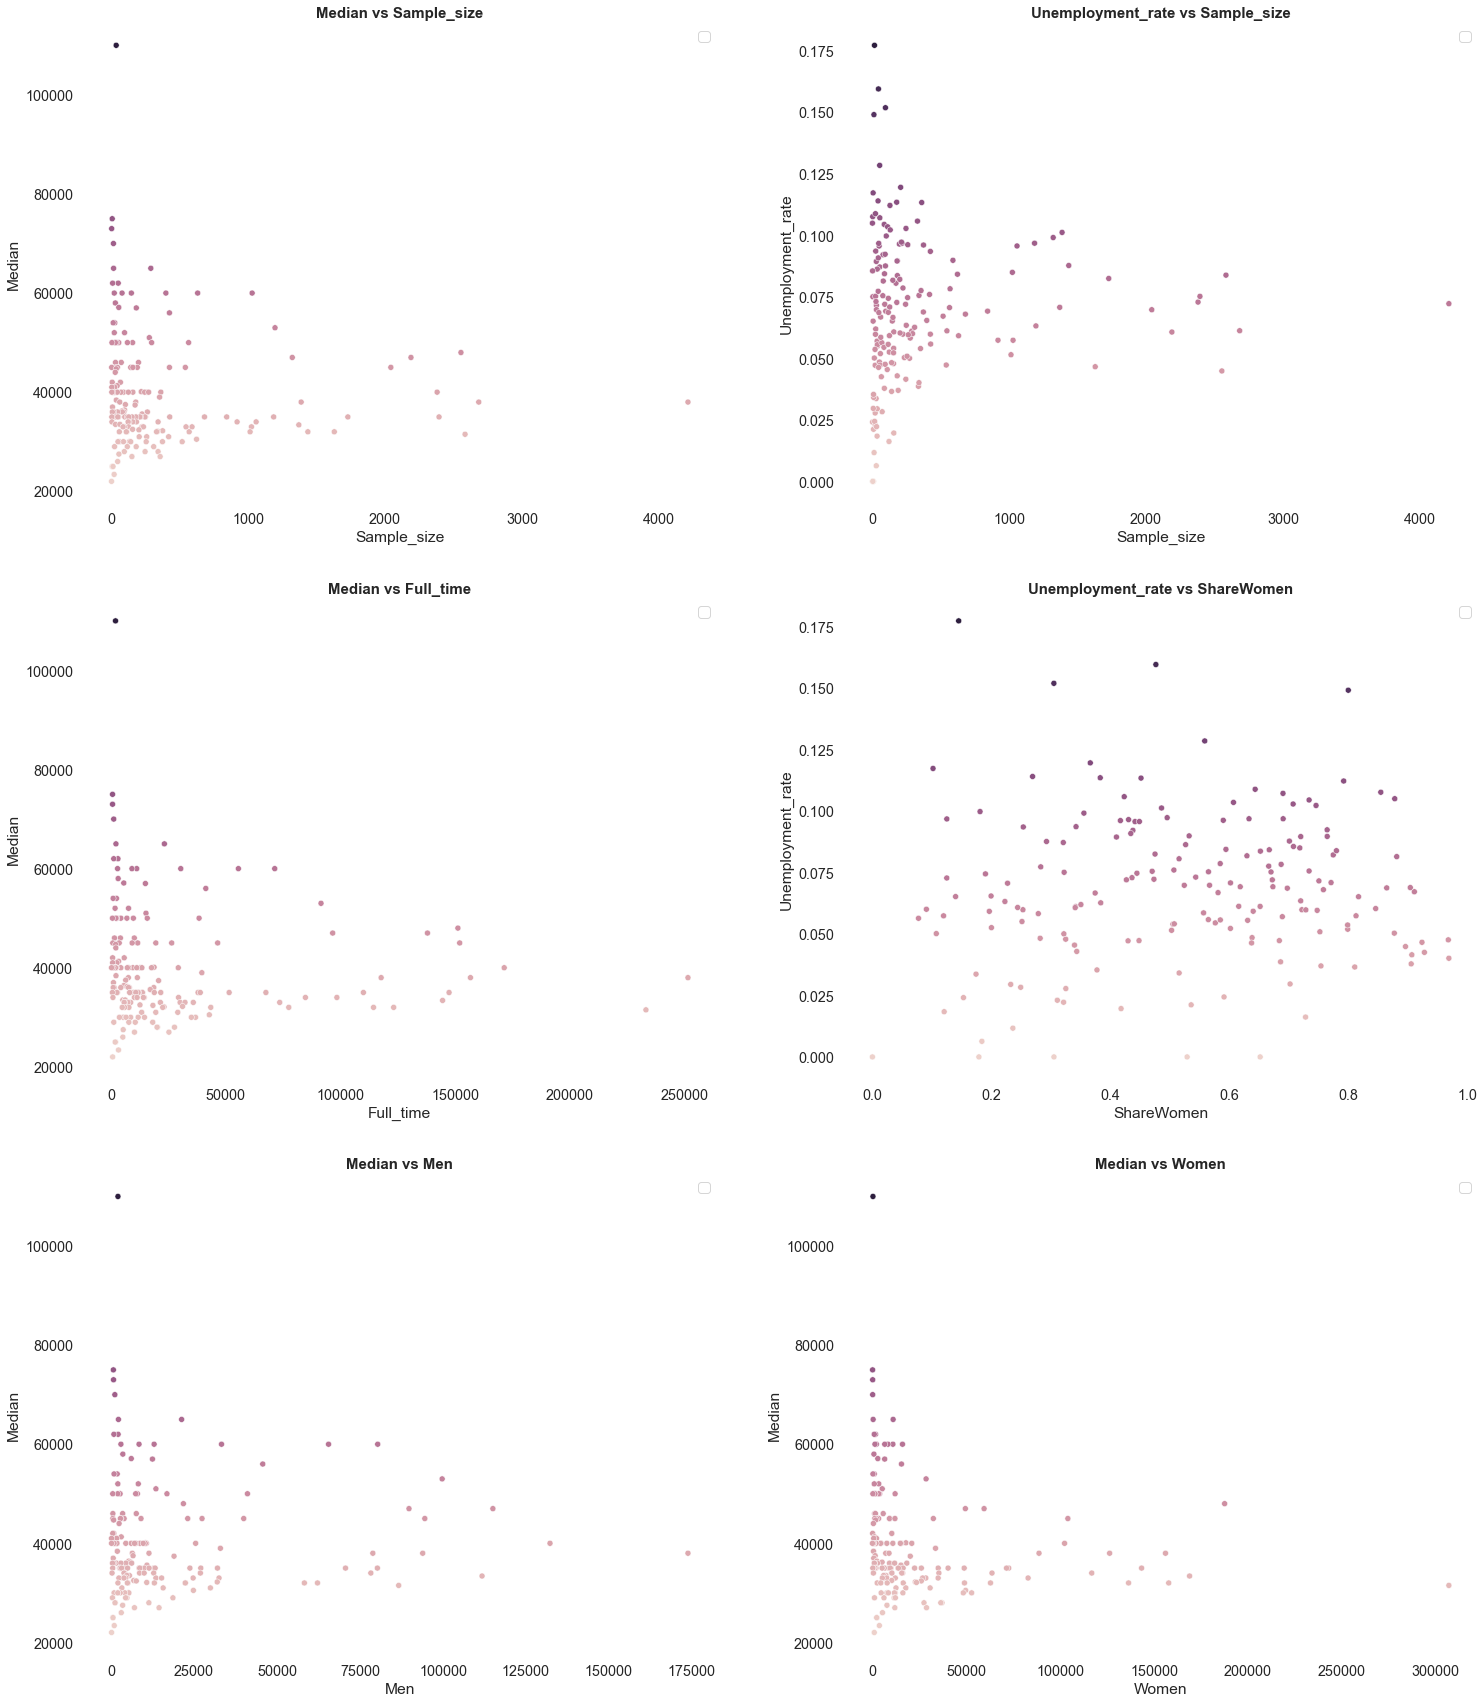

In [12]:
#Generate scatterplots in one go using a for loop

x_val = ['Sample_size','Sample_size', 'Full_time', 'ShareWomen', 'Men', 'Women']
y_val = ['Median','Unemployment_rate', 'Median', 'Unemployment_rate', 'Median', 'Median']

fig = plt.figure(figsize=(25, 30))
for sp in range (len(x_val)):
    ax = fig.add_subplot(3,2,sp+1)
    ax = sns.scatterplot(data = recent_grads, x= x_val[sp], y= y_val[sp], hue = y_val[sp])
    plt.title(y_val[sp] + ' vs ' + x_val[sp], weight='bold').set_fontsize('15')
    sns.despine(left=True, bottom=True)
    plt.legend('')
plt.show()

Based on the plot above, we can see that all of the plots suggest that there is no significant relationship between the x & y variables:
- On all the plots except for 'Unemployment_rate vs ShareWomen', we can see that there is a high variance near the 0 points, but as the y-value increases the variance diminishes.
- On 'Unemployment_rate vs ShareWomen', we can see that the dots are arbitrarily spread out. We can say the variances are pretty much equal at all ranges, which suggest that none of the variables have any effect on each other.

Remember that we have 3 questions?<br>
So, using the Median vs Full_time plot that we have above, we managed to answer one of the questions,

Q1: "Is there any link between the number of full-time employees and median salary?",<br>
- and the answer to the question is no. There is no link between the two
* since we know that on all plots there is no significant relationship between the x & y variable (see the plot for detail)



So... ONE down! TWO to go! We stil have two unanswered questions, which are:

- Do students in more popular majors make more money?
- Do students that majored in subjects that were majority female make more money?

So let's make a few more plots to find the answers

Q2: "Do students in more popular majors make more money?"<br>
Total :Total number of people with major. Median :Median salary of full-time, year-round workers.

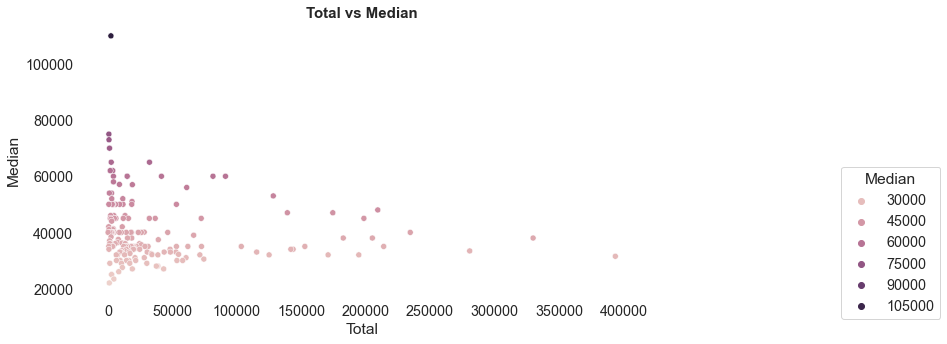

In [13]:
fig, ax =plt.subplots(1,1, figsize =(10,5))
sns.scatterplot(data = recent_grads, x='Total', y='Median', hue ='Median')
sns.despine(left=True, bottom=True)
plt.title('Total vs Median', weight='bold').set_fontsize('15')
plt.legend(bbox_to_anchor=(1.55, 0.5), title= 'Median')
plt.show()

Based on the plot, the answer is no. There is no correlation between Median and Total.<br>
We can see that there is a high variance near the 0 points, but as Total increases the variance diminishes.<br>

In other words, there is no correlation between the popularity of the major, and money

Q3: "Do students that majored in subjects that were majority female make more money?"<br>
ShareWomen: Women as share of total. Median: Median salary of full-time, year-round workers.

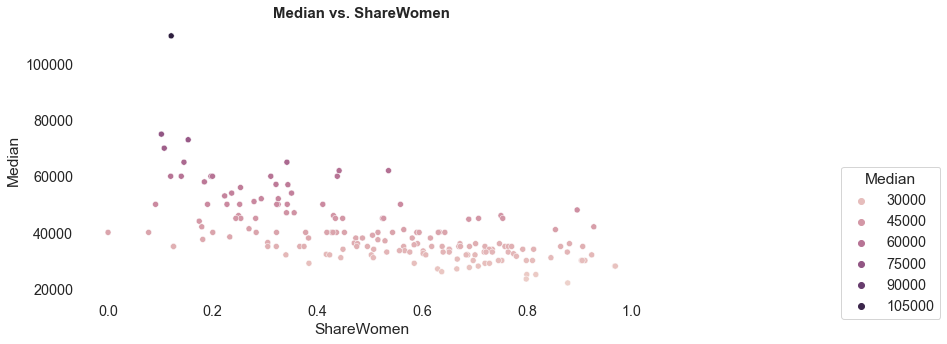

In [14]:
fig, ax =plt.subplots(1,1, figsize =(10,5))
sns.scatterplot(data = recent_grads, x='ShareWomen', y='Median', hue ='Median')
sns.despine(left=True, bottom=True)
plt.title('Median vs. ShareWomen', weight='bold').set_fontsize('15')
plt.legend(bbox_to_anchor=(1.55, 0.5), title= 'Median')
plt.show()

Based on the plot, there is a weak negative correlation between Median and ShareWomen. We can see that as Sharewomen increases, the Median decreases.

<br>In other words, the students that majored in subjects that were female majority tend to make less money.

<br>But really? Hmm we need more evidence. Let's analyze!

<br>We need numbers!

**Q3 analysis: Deep diving on Median and ShareWomen**

In [15]:
#Analyze ShareWomen and Median using groupby()

median_sharewomen = recent_grads.groupby(["ShareWomen"])["Median"].mean().sort_values(ascending=False)
print(median_sharewomen)

ShareWomen
0.120564    110000.0
0.101852     75000.0
0.153037     73000.0
0.107313     70000.0
0.144967     65000.0
              ...   
0.637293     26000.0
0.799859     25000.0
0.817099     25000.0
0.798746     23400.0
0.877960     22000.0
Name: Median, Length: 172, dtype: float64


Alright, so the result suggest that ShareWomen with low values tend to get higher median earnings, and vice versa.<br>
However, to be more confident in our analysis , let's group ShareWomen into 3 bins, and see what is the average Median of each group.

Are we still getting a negative correlation? let's find out

In [16]:
#splitting ShareWomen into 3 groups
sharewomen_grouped = recent_grads["ShareWomen"].value_counts(bins = 3).sort_index(ascending= False)
sharewomen_grouped

(0.646, 0.969]                     60
(0.323, 0.646]                     71
(-0.0019690000000000003, 0.323]    41
Name: ShareWomen, dtype: int64

ShareWomen
(-0.00197, 0.323]    50846.341463
(0.323, 0.646]       39695.774648
(0.646, 0.969]       33168.333333
Name: Median, dtype: float64


<ipython-input-17-13a3e02cf455>:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=sorted(median_sharewomen_grouped.index), y=median_sharewomen_grouped, data=recent_grads, ci=None)


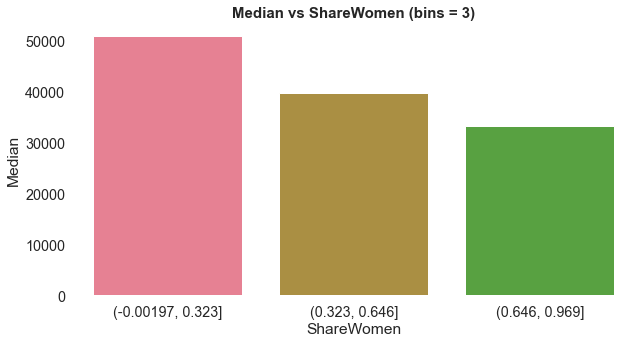

In [17]:
#using sns.barplot
#we are creating a barplot with 3 bins

bins = [-0.0019690000000000003, 0.323, 0.646, 0.969] #using the bins from the previous result

median_sharewomen_grouped = recent_grads.groupby(pd.cut(recent_grads["ShareWomen"], 
                                                        bins))["Median"].mean().sort_values(ascending= False)
print(median_sharewomen_grouped)

fig, ax =plt.subplots(1,1, figsize =(10,5))

plt.xlabel('ShareWomen')
plt.ylabel('Median')
sns.barplot(x=sorted(median_sharewomen_grouped.index), y=median_sharewomen_grouped, data=recent_grads, ci=None)
plt.title('Median vs ShareWomen (bins = 3)', weight='bold').set_fontsize('15')
sns.despine(left=True, bottom=True)

it's true! the students that majored in subjects that were female majority on average make less money.<br>

So... just to recap:
    - "Do students in more popular majors make more money?"
Answer: No. There is correlation between the popularity of the major, and money

**"Do students that majored in subjects that were majority female make more money?"**

Answer: The opposite is true. The students that majored in subjects that were female majority on average make less money.

**"Is there any link between the number of full-time employees and median salary?"**

Answer: None of them have amy link with each other

**We have managed to answer these questions by creating scatterplots for:**

- Sample_size and Median<br>
- Sample_size and Unemployment_rate
- Full_time and Median
- ShareWomen and Unemployment_rate
- Men and Median
- Women and Median
- Total vs Median
- Median vs ShareWomen (we also did a deep dive analysis on this one, by creating a bar plot)

**We're done with scatterplots, next we will create histograms!**

## Histograms: Exploring The Distribution of Values In A Column

Using sns.histplot<br>
Let's generate histograms to explore the distributions of the following columns:<br>
* Note: We're going to use Series.describe() to understand the data distribution of each column

- Sample_size: Sample size (unweighted) of full-time, year-round ONLY (used for earnings)
- Median: Median salary of full-time, year-round workers
- Employed: Number employed
- Full_time: Number employed 35 hours or more
- ShareWomen: Women as share of total
- Unemployment_rate: Percent of labor force that is jobless
- Men: Male graduates
- Women: Female graduates

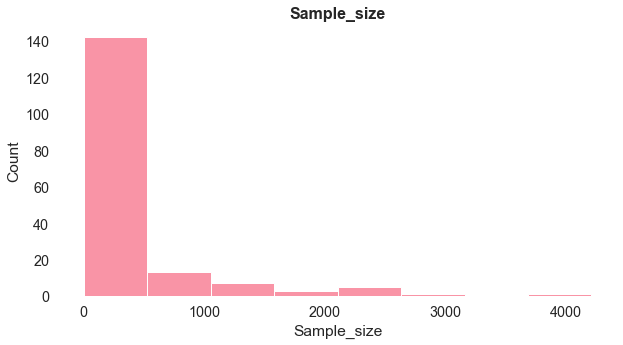

--------------------------------
count     172.000000
mean      357.941860
std       619.680419
min         2.000000
25%        42.000000
50%       131.000000
75%       339.000000
max      4212.000000
Name: Sample_size, dtype: float64
--------------------------------


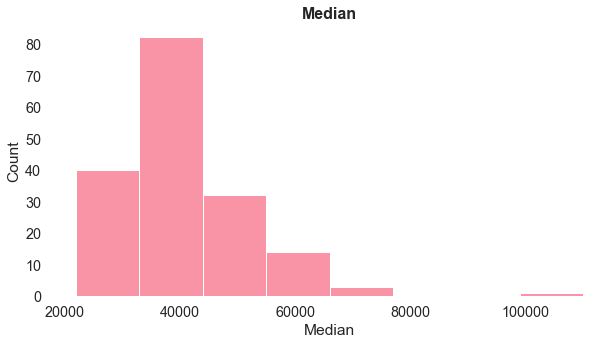

--------------------------------
count       172.000000
mean      40076.744186
std       11461.388773
min       22000.000000
25%       33000.000000
50%       36000.000000
75%       45000.000000
max      110000.000000
Name: Median, dtype: float64
--------------------------------


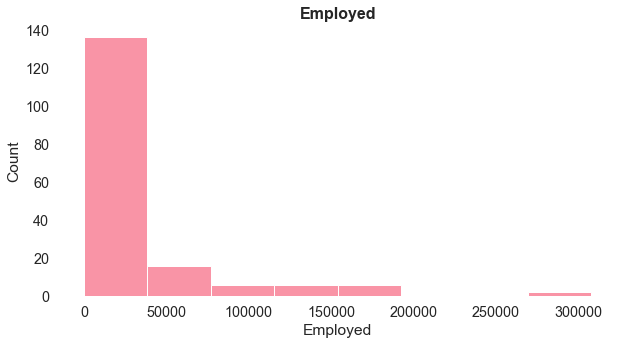

--------------------------------
count       172.00000
mean      31355.80814
std       50777.42865
min           0.00000
25%        3734.75000
50%       12031.50000
75%       31701.25000
max      307933.00000
Name: Employed, dtype: float64
--------------------------------


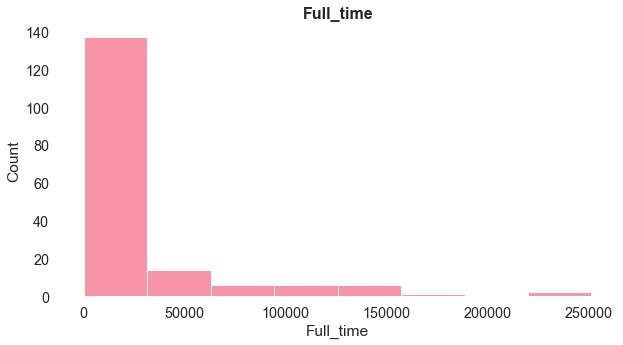

--------------------------------
count       172.000000
mean      26165.767442
std       42957.122320
min         111.000000
25%        3181.000000
50%       10073.500000
75%       25447.250000
max      251540.000000
Name: Full_time, dtype: float64
--------------------------------


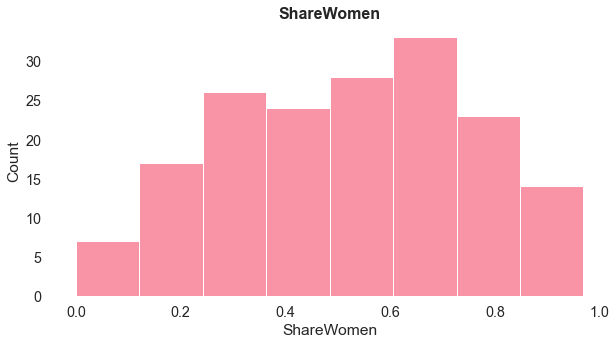

--------------------------------
count    172.000000
mean       0.522223
std        0.231205
min        0.000000
25%        0.336026
50%        0.534024
75%        0.703299
max        0.968954
Name: ShareWomen, dtype: float64
--------------------------------


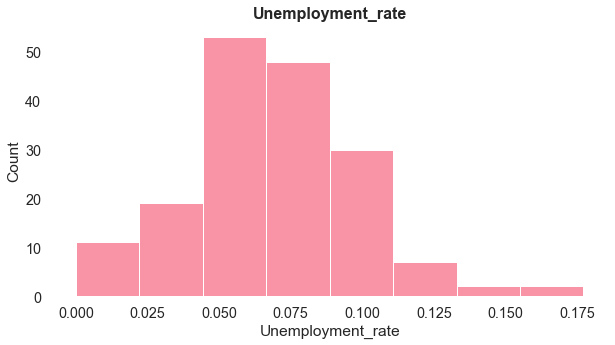

--------------------------------
count    172.000000
mean       0.068024
std        0.030340
min        0.000000
25%        0.050261
50%        0.067544
75%        0.087247
max        0.177226
Name: Unemployment_rate, dtype: float64
--------------------------------


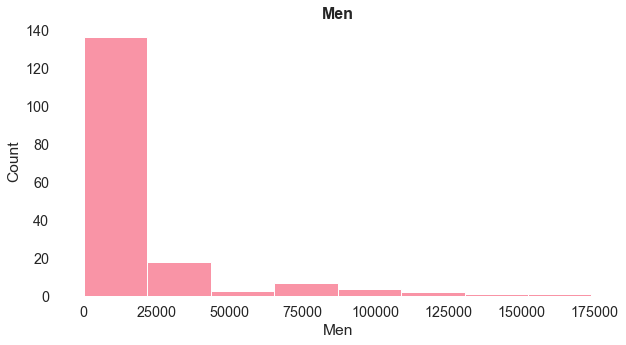

--------------------------------
count       172.000000
mean      16723.406977
std       28122.433474
min         119.000000
25%        2177.500000
50%        5434.000000
75%       14631.000000
max      173809.000000
Name: Men, dtype: float64
--------------------------------


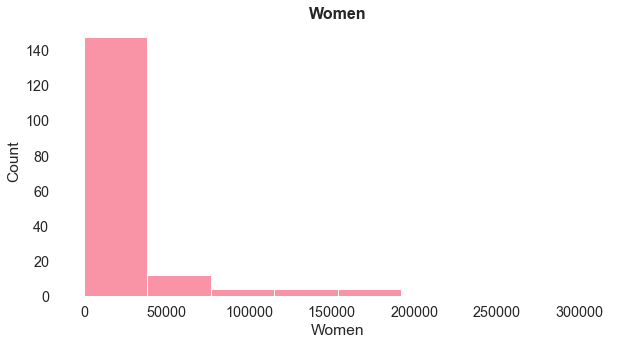

--------------------------------
count       172.000000
mean      22646.674419
std       41057.330740
min           0.000000
25%        1778.250000
50%        8386.500000
75%       22553.750000
max      307087.000000
Name: Women, dtype: float64
--------------------------------


In [18]:
#Generate histograms in one go using a for loop
#we use 8 bins to simplify the visualization

cols = ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]


for sp in range (len(cols)):
    fig = plt.subplots(0,8, figsize =(10,5))
    sns.histplot(data = recent_grads, x= cols[sp],  bins = 8)
    sns.despine(left=True, bottom=True)
    plt.title(cols[sp], weight='bold').set_fontsize('16')
    plt.show()
    print('--------------------------------')
    print(recent_grads[cols[sp]].describe())
    print('--------------------------------')

**Cool, using histograms we are able to comfortably visualize the data distribution. But what are the takeaways?**

Sample_size:
- Most values are within (0, 500) based on histogram
- 75% values are within [2, 339] based on series.describe( )

Median:
- Most values are within (30000, 40000) based on histogram
- 75% values are within [22000, 45000] based on series.describe( )
- Ie. Students in most majors make around $30,000 - $40,000 annually.

Employed:
- Most values are within (0, 50000) based on histogram
- 75% values are within [0, 31701] based on series.describe( )

Full-time:
- Most values are within (0, 2500) based on histogram
- 75% values are within [111, 25447] based on series.describe( )
- Ie. Most graduates don't have a full-time job
- Note that the histogram for full-time and employed looks similar, which is intuitively correct.

ShareWomen:
- The values in this histogram is more evenly spread out compared to the others
- Most values are within (.6, .7) based on histogram

Unemployment_rate:
- Most values are within (.05, .0625) based on histogram
- Common unemployment rates are between 5.5% - 6.25%

Men:
- Most male garduates are within (0, 25000) based on histogram
- 75% male graduates are within [119, 14631] based on series.describe( )

Women:
- Most female graduates are within (0, 25000) based on histogram
- 75% of female graduates are within [0, 22553] based on series.describe()

**Analysis: Deep diving on Sample_size, Employed, ShareWomen, and Women**

A few quirky things from histograms and series.describe( ) caught my attention. Let's dive right into it.<br>

Sample_size: Sample size (unweighted) of full-time, year-round ONLY (used for earnings)

In [19]:
#exploring rows that have the most common sample size values --> Sample_size: (0, 500)

common_samplesize = recent_grads[recent_grads["Sample_size"].between(0, 500)]
common_samplesize.sort_values(by='Sample_size', ascending=False)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
97,98,5098,MULTI-DISCIPLINARY OR GENERAL SCIENCE,62052.0,27015.0,35037.0,Physical Sciences,0.564639,427,46138,...,13133,28966,2727,0.055807,35000,24000,50000,17923,22039,5751
17,18,2400,GENERAL ENGINEERING,61152.0,45683.0,15469.0,Engineering,0.252960,425,44931,...,7199,33540,2859,0.059824,56000,36000,69000,26898,11734,3192
42,43,2100,COMPUTER AND INFORMATION SYSTEMS,36698.0,27392.0,9306.0,Computers & Mathematics,0.253583,425,28459,...,4332,21130,2934,0.093460,45000,30000,60000,13344,11783,1672
146,147,6002,MUSIC,60633.0,29909.0,30724.0,Arts,0.506721,419,47662,...,24943,21425,3918,0.075960,31000,22300,42000,13752,28786,9286
10,11,2407,COMPUTER ENGINEERING,41542.0,33258.0,8284.0,Engineering,0.199413,399,32506,...,5146,23621,2275,0.065409,60000,45000,75000,23694,5721,980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.000000,4,0,...,0,111,0,0.000000,40000,40000,40000,0,0,0
55,56,2303,SCHOOL STUDENT COUNSELING,818.0,119.0,699.0,Education,0.854523,4,730,...,135,545,88,0.107579,41000,41000,43000,509,221,0
48,49,3607,PHARMACOLOGY,1762.0,515.0,1247.0,Biology & Life Science,0.707719,3,1144,...,532,565,107,0.085532,45000,40000,45000,603,478,93
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


**Calculate the sample size percentage of this dataset**

In [20]:
#just some math
sample_dataset = recent_grads["Sample_size"] / recent_grads["Full_time_year_round"]
sample_dataset.describe()

count    172.000000
mean       0.017747
std        0.004970
min        0.004162
25%        0.015208
50%        0.017751
75%        0.020870
max        0.036036
dtype: float64

So based on sample_dataset.describe(), we know the following:

- Average sample size used is 1.7%
- Minimum sample size used is .4% (we just calculated it earlier, it belongs to LIBRARY SCIENCE major)
- Maximum sample size used is 3.6%, 

The sample size is SUPER LOW

**Employed: Number employed**

So earlier we figured that most majors have a really low number of employment, which is not surprising.<br>
However, what surprises me is that **there is a major that has 0 people employed**. I wonder which major(s). Let's see...

In [21]:
#checking major(s) with 0 people employed
recent_grads[recent_grads["Employed"] == 0]

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
73,74,3801,MILITARY TECHNOLOGIES,124.0,124.0,0.0,Industrial Arts & Consumer Services,0.0,4,0,...,0,111,0,0.0,40000,40000,40000,0,0,0


**"How many majors are predominantly male?"**

In [22]:
#create a new column
recent_grads["gender_majority"] = np.nan 

#add values to the new column
recent_grads.loc[recent_grads["ShareWomen"] > .5, "gender_majority"] = "Female"
recent_grads.loc[recent_grads["ShareWomen"] < .5, "gender_majority"] = "Male"

#display
recent_grads 

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs,gender_majority
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,1207,37,0.018381,110000,95000,125000,1534,364,193,Male
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,388,85,0.117241,75000,55000,90000,350,257,50,Male
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,340,16,0.024096,73000,50000,105000,456,176,0,Male
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,692,40,0.050125,70000,43000,80000,529,102,0,Male
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,16697,1672,0.061098,65000,50000,75000,18314,4440,972,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,3602,304,0.046320,26000,20000,39000,2771,2947,743,Female
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,1211,148,0.065112,25000,24000,34000,1488,615,82,Female
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,1293,368,0.149048,25000,25000,40000,986,870,622,Female
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,2738,214,0.053621,23400,19200,26000,2403,1245,308,Female


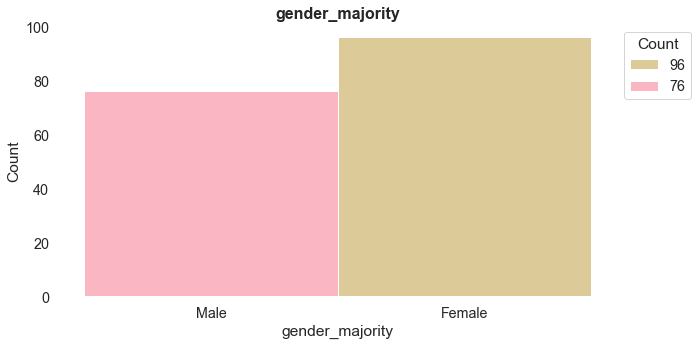

In [23]:
#using histplot
#we are creating a histogram to answer the question, "How many majors are predominantly male?"

fig = plt.subplots(0,8, figsize =(10,5))

#differentiate color b/w gender_majority using hue
sns.histplot(data = recent_grads, x= "gender_majority", hue = "gender_majority") 
sns.despine(left=True, bottom=True)
plt.title("gender_majority", weight='bold').set_fontsize('16')

#display #count on legend
plt.legend(recent_grads["gender_majority"].value_counts(),bbox_to_anchor=(1, 1), title= 'Count') 
plt.show()

**As we can see, 96 majors are predominantly Female, and 76 majors are predominantly Male. Cool...**

Well, you know what they say, "All good things must come to an end"